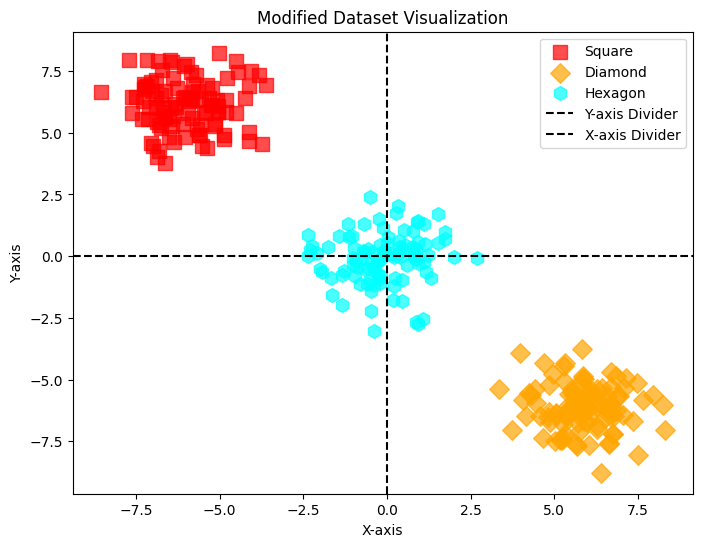

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)

square = np.random.randn(100, 2) + np.array([-6, 6])
diamond = np.random.randn(100, 2) + np.array([6, -6])
hexagon = np.random.randn(100, 2) + np.array([0, 0])

X = np.vstack([square, diamond, hexagon])
Y = np.array([0]*100 + [1]*100 + [2]*100).reshape(-1, 1)

Y_one_hot = np.zeros((Y.size, 3))
Y_one_hot[np.arange(Y.size), Y.reshape(-1)] = 1


np.random.seed(0)
indices = np.random.permutation(X.shape[0])

train_size = int(0.8 * X.shape[0])
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
Y_train = Y_one_hot[train_indices]
Y_test = Y_one_hot[test_indices]



#Data Visualization

plt.figure(figsize=(8, 6))

plt.scatter(square[:, 0], square[:, 1], color='red', label='Square', marker='s', alpha=0.7, s=100)
plt.scatter(diamond[:, 0], diamond[:, 1], color='orange', label='Diamond', marker='D', alpha=0.7, s=100)
plt.scatter(hexagon[:, 0], hexagon[:, 1], color='cyan', label='Hexagon', marker='h', alpha=0.7, s=100)

plt.axhline(y=0, color='black', linestyle='--', label='Y-axis Divider')
plt.axvline(x=0, color='black', linestyle='--', label='X-axis Divider')


plt.title('Modified Dataset Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()


plt.show()



This code generates a synthetic dataset consisting of three classes (square, diamond, and hexagon) using random values and shifts them to specific locations in a 2D space. It then manually applies one-hot encoding to the labels and splits the dataset into training (80%) and testing (20%) sets. The dataset is visualized using a scatter plot, where each class is represented by a different color and shape, and additional lines are drawn to mark the X and Y axes

Epoch 0, Loss: 0.3996
Epoch 100, Loss: 0.3123
Epoch 200, Loss: 0.1222
Epoch 300, Loss: 0.0907
Epoch 400, Loss: 0.0777
Epoch 500, Loss: 0.0691
Epoch 600, Loss: 0.0624
Epoch 700, Loss: 0.0568
Epoch 800, Loss: 0.0521
Epoch 900, Loss: 0.0480
Epoch 1000, Loss: 0.0444
Epoch 1100, Loss: 0.0412
Epoch 1200, Loss: 0.0383
Epoch 1300, Loss: 0.0357
Epoch 1400, Loss: 0.0334
Epoch 1500, Loss: 0.0313
Epoch 1600, Loss: 0.0294
Epoch 1700, Loss: 0.0277
Epoch 1800, Loss: 0.0261
Epoch 1900, Loss: 0.0247
Epoch 2000, Loss: 0.0234
Epoch 2100, Loss: 0.0222
Epoch 2200, Loss: 0.0212
Epoch 2300, Loss: 0.0202
Epoch 2400, Loss: 0.0193
Epoch 2500, Loss: 0.0184
Epoch 2600, Loss: 0.0177
Epoch 2700, Loss: 0.0170
Epoch 2800, Loss: 0.0163
Epoch 2900, Loss: 0.0157


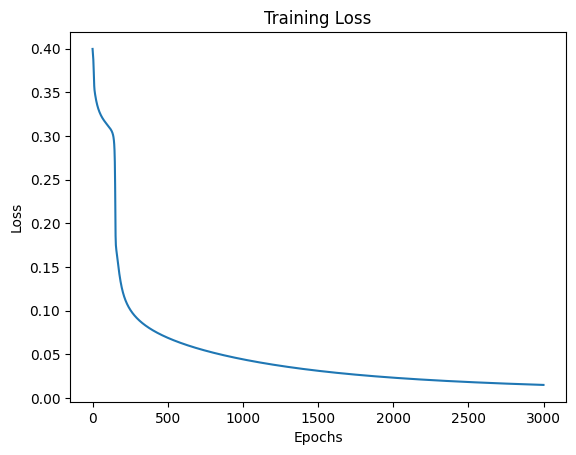

In [56]:
#Neural Network Initialization and Architecture

import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_neurons, hidden_neurons, output_neurons, learning_rate=0.01):
        self.learning_rate = learning_rate

        self.W_H1 = np.random.randn(input_neurons, hidden_neurons)
        self.W_H2 = np.random.randn(hidden_neurons, hidden_neurons)
        self.W_H3 = np.random.randn(hidden_neurons, hidden_neurons)
        self.W_OH = np.random.randn(hidden_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        """Activation function: Sigmoid"""
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))



#Feedforward and Backpropagation Functions

    def feedForward(self, X):
        """Forward pass"""
        self.hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        self.output_input = np.dot(self.hidden_output3, self.W_OH)
        pred = self.sigmoid(self.output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        """Backward pass"""
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        hidden_error3 = output_delta.dot(self.W_OH.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        # Update the weights
        self.W_OH += self.hidden_output3.T.dot(output_delta)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 += X.T.dot(hidden_delta1)


#Training and Visualization

    def train(self, X, Y, epochs=3000, patience=200):
        """Train the network with Early Stopping"""
        err = []
        best_loss = np.inf
        wait = 0

        for epoch in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = np.mean(np.square(Y - pred))
            err.append(loss)

            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")


            if loss < best_loss:
                best_loss = loss
                wait = 0
            else:
                wait += 1
                if wait >= patience:
                    print(f"Early stopping at epoch {epoch}")
                    break

        return err


    def predict(self, X):
        """Predict the class"""
        pred = self.feedForward(X)
        return np.argmax(pred, axis=1)


NN = NeuralNetwork(input_neurons=2, hidden_neurons=20, output_neurons=3, learning_rate=0.005)


err = NN.train(X_train, Y_train, epochs=3000, patience=200)


plt.plot(range(0, len(err)), err)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


1. **Initialization**: In the `NeuralNetwork` class, the weights for the input, hidden, and output layers are initialized randomly. The learning rate is set during class initialization.

2. **Activation**: The `sigmoid` function is defined to apply the sigmoid activation function and optionally return its derivative for use in backpropagation.

3. **Feedforward**: The `feedForward` method computes the activations of each layer (input to hidden, hidden to hidden, and hidden to output) using matrix multiplication and the sigmoid function, returning the output prediction.

4. **Backpropagation & Training**: The `backPropagation` method calculates the gradients of the error and updates the weights, while the `train` method runs the training loop with early stopping based on the loss. The model is trained on `X_train` and `Y_train`, and the training loss is plotted.


In [57]:
#Model Accuracy Evaluation

predictions = NN.predict(X_test)
true_labels = np.argmax(Y_test, axis=1)


accuracy = np.mean(predictions == true_labels)
print(f"Test Accuracy: {accuracy:.2f}")


Test Accuracy: 1.00


The code uses the trained model to predict on the test set (X_test) and converts the one-hot encoded labels (Y_test) to class labels. It then calculates and prints the accuracy by comparing predicted labels to the true class labels.

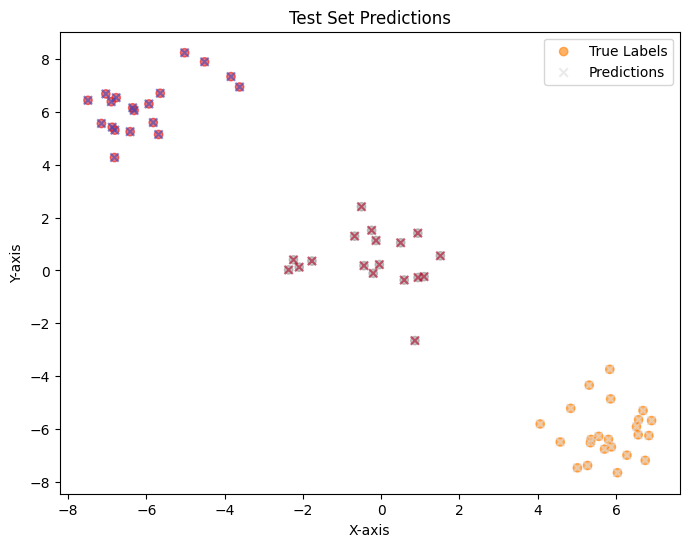

In [58]:
#Visualization of predictions

plt.figure(figsize=(8, 6))


plt.scatter(X_test[:, 0], X_test[:, 1], c=true_labels, cmap='Set1', marker='o', label='True Labels', alpha=0.6)

plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='coolwarm', marker='x', label='Predictions', alpha=0.6)

plt.legend()
plt.title('Test Set Predictions')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()









The above code visualizes the test set by plotting true labels and predictions on a scatter plot with different colors, showing the distribution of predicted and actual class labels.